<a href="https://colab.research.google.com/github/fosofou/ml-course/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [ ] Считать данные и вывести их основные характеристики, описание признаков.
- [ ] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [ ] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [ ] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [ ] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [ ] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

## Решение задачи

Импортируем библиотеки

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Импортируем датасет. Ссылка на датасет: https://www.kaggle.com/datasets/zynicide/wine-reviews


In [210]:
df = pd.read_csv('/content/winemag-data-130k-v2.csv', index_col=0)
df.shape[0]

129971

Датасет **"Wine Reviews"** представляет из себя информацию об оценках различных видов вина. В наборе данных содержатся следующие поля:

 - Country - страна происхождения.
 - Description - описание.
 - Designation - обозначение вина.
 - Points - оценка вина, выставленная Wine Enthusiast (целевой признак).
 - Price - цена бутылки.
 - Province - провинция или регион происхождения вина.
 - Region_1 - более конкретное местоположение происхождения.
 - Region_2 - дополнительная информация о местоположении.
 - Taster_name - имя того, кто дегустировал и выставил оценку.
 - Taster_twitter_handle - Twitter-аккаунт дегустатора.
 - Title - заголовок обзора.
 - Variety - сорт винограда.
 - Winery - винодельня.

Целевым признаком, который мы будем интересоваться, является **Points** - оценка вина. Мы будем стремиться предсказывать оценку вина на основе других признаков. Предположу что сильное влияние на оценку вина окажет признак цена, возможно год изготовления и винодельня. Так же можно будет присмотреться с признаку "description".

In [211]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


Проверим пропущенные значения.

In [213]:
df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [214]:
df.isnull().mean()

country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

**Обработаем пропуски**
- пропуск в столбце variety всего 1, поэтому просто удалим


In [215]:
df['variety'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['variety'])

- Столбец region_2 не несёт какой-то важной информации, поэтому просто удалим его

In [216]:
df = df.drop('region_2', axis=1)

- пропуск в столбце country заполним по variety и winery ( создадим словари, сопоставляющие каждую уникальные (winery, varierty) с соответствующей страной (country)


In [217]:
variety_country_mapping  = df.groupby('variety')['country'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
df['country'] = df.apply(lambda row: variety_country_mapping.get(row['variety']) if pd.isnull(row['country']) else row['country'], axis=1)

winery_country_mapping = df.groupby('winery')['country'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
df['country'] = df.apply(lambda row: winery_country_mapping.get(row['winery']) if pd.isnull(row['country']) else row['country'], axis=1)

Проверим, что не осталось пустых значений. Результат отрицательный, но их осталось только 2, поэтому просто удалим

In [218]:
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4243,None,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
119787,None,This deep red-violet wine has a nose of blackb...,NaN,90,30.0,NaN,NaN,Mike DeSimone,@worldwineguys,Amiran Vepkhvadze 2014 Otskhanuri Sapere,Otskhanuri Sapere,Amiran Vepkhvadze


In [219]:
df = df.dropna(subset=['country'])

- Заполним столбец province по словарю уникальных значений пар {country: province}

In [220]:
country_province_mapping = df.groupby('country')['province'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
df['province'] = df.apply(lambda row: country_province_mapping.get(row['country']) if pd.isnull(row['province']) else row['province'], axis=1)


In [221]:
df[df['province'].isnull()]

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery


Теперь посмотрим на признак title можно заметить, что он содержит в себе значение года изготовленеия.
 - Поэтому добавим колонку year и заполним её данными из признака title, предварительно их обработав

Создадим функци, которая будет определять какое число из списка ближе всего к 2006 (2006 год выбрал средее значение из 20 наиболее часто встречающихся)

In [130]:
def closest_to_2006(numbers):
    return min(numbers, key=lambda x: abs(x - 2006))

In [131]:
import re
df['filtered_numbers'] = df['title'].apply(lambda x: [int(num) for num in re.findall(r'\b[12]\d{3}\b', x) if int(num) > 1600])
df['year'] = df['filtered_numbers'].apply(lambda x: closest_to_2006(x) if isinstance(x, list) and x else None)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [142]:
df[df['year'].isnull()]


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,filtered_numbers,year


Видим, что у нас ещё осталось 4610 пропущенных значений, заполним их средним

In [141]:
mean_year = df['year'].mean()
df['year'] = df['year'].fillna(mean_year)

In [145]:
df.isnull().sum()

country                      0
description                  0
designation              37463
points                       0
price                     8996
province                     0
region_1                 21244
taster_name              26243
taster_twitter_handle    31212
title                        0
variety                      0
winery                       0
filtered_numbers             0
year                         0
dtype: int64

Видим что много пропущенных значений у признаков designation, price, region_1, taster_name, taster_twitter_handle
 - Предположу, что значение признака designation слабо влияет на признак points. Но значение этого признака можно достать из title (решил удалить код)
 - Признак region_1 обозначает примерно то же, что и province, поэтому можем его удалить
 - Пока не знаю как можно заполнить признак taster_name, считаю его существенным, т.к критики могут иметь какие-то предпочтения и это будет влиять на оценку
 - Признак taster_twitter_handle считаю ненужным, он нам не даёт никакой доп. информации, если мы конечно не хотим скачать твиты критика


In [160]:
df = df.drop('region_1', axis=1)
df = df.drop('taster_twitter_handle', axis=1)

Нулевые значения признака price я решил заполнить медианными значениями price, предварительно сгруппировав их по признаку points  

In [158]:
median_prices = df.groupby('points')['price'].median()
df['price'] = df.apply(lambda row: median_prices[row['points']] if pd.isnull(row['price']) else row['price'], axis=1)

In [161]:
df.isnull().sum()

country                 0
description             0
designation         37463
points                  0
price                   0
province                0
taster_name         26243
title                   0
variety                 0
winery                  0
filtered_numbers        0
year                    0
dtype: int64

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,filtered_numbers,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,[2013],2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,[2011],2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,[2013],2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,[2013],2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[2012],2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129962,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,[2013],2013.0
129964,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,[2004],2004.0
129965,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,[2013],2013.0
129966,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,[2012],2012.0


In [147]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,filtered_numbers,year,price_mean,price_filled
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,[2013],2013.0,NaN,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,[2011],2011.0,33.333333,15.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,[2013],2013.0,14.000000,14.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,[2013],2013.0,16.000000,13.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[2012],2012.0,45.000000,65.0


In [163]:
df.describe()

,points,price,year
count,129968.000000,129968.000000,129968.000000
mean,88.447133,35.007029,2010.659615
std,3.039762,39.824347,4.144766
min,80.000000,4.000000,1607.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


Разобъём признак **price** на категории

In [169]:
df['price_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['price'] <= 10, 'price_category'] = 0  # далле разбиваем цену на 5 категорий
df.loc[(df['price'] > 10) & (df['price'] <= 20), 'price_category'] = 1
df.loc[(df['price'] > 20) & (df['price'] <= 50), 'price_category'] = 2
df.loc[(df['price'] > 50) & (df['price'] <= 100), 'price_category'] = 3
df.loc[df['price'] > 100, 'price_category'] = 4
df.head()

,country,description,designation,points,price,province,taster_name,title,variety,winery,filtered_numbers,year,price_category
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,20.0,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,[2013],2013.0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,[2011],2011.0,1
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,[2013],2013.0,1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,[2013],2013.0,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[2012],2012.0,3


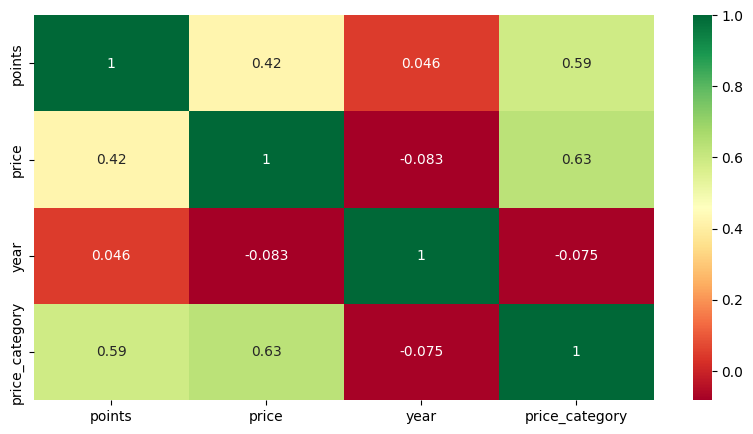

In [168]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Разобъем так же признак **year**

In [171]:
df['year'].max()

2017.0

In [176]:
current_year = df['year'].max()
df['year_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['year'] <= current_year, 'year_category'] = 0  # далле разбиваем года 5 категорий
df.loc[(df['year'] > current_year - 2) & (df['year'] <= current_year - 1), 'year_category'] = 1
df.loc[(df['year'] > current_year - 5) & (df['year'] <= current_year - 2), 'year_category'] = 2
df.loc[((df['year'] > current_year - 10) & (df['year'] <= current_year - 5)), 'year_category'] = 3
df.loc[df['year'] < current_year - 10, 'year_category'] = 4
df.head()

,country,description,designation,points,price,province,taster_name,title,variety,winery,filtered_numbers,year,price_category,year_category
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,20.0,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,[2013],2013.0,1,2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,[2011],2011.0,1,3
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,[2013],2013.0,1,2
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,[2013],2013.0,1,2
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[2012],2012.0,3,3


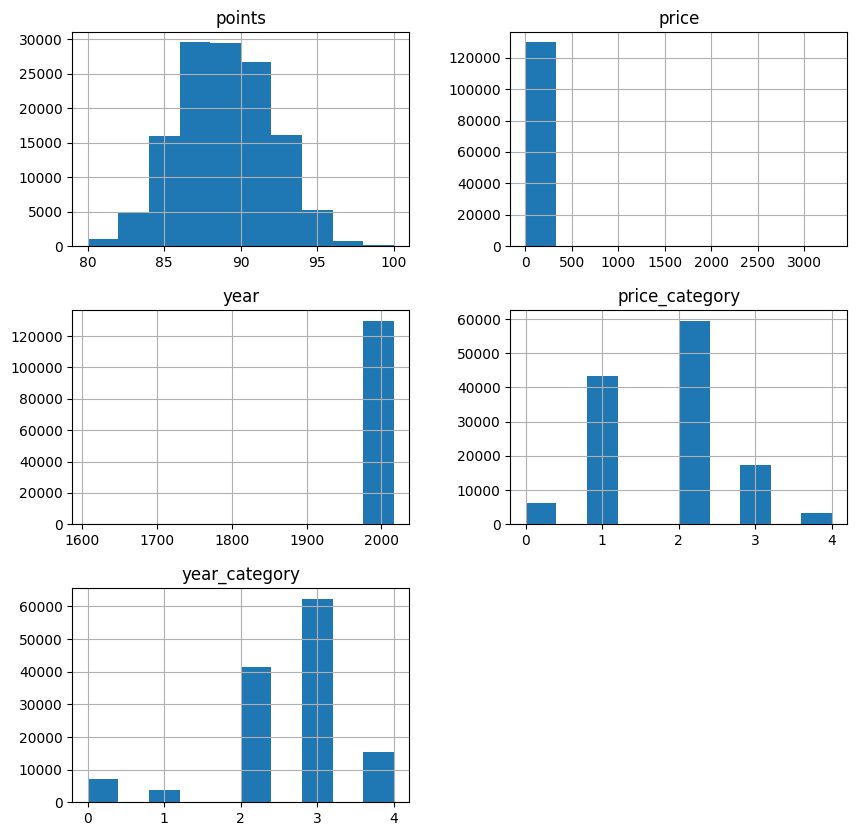

In [178]:
df.hist(figsize=(10, 10))
plt.show()

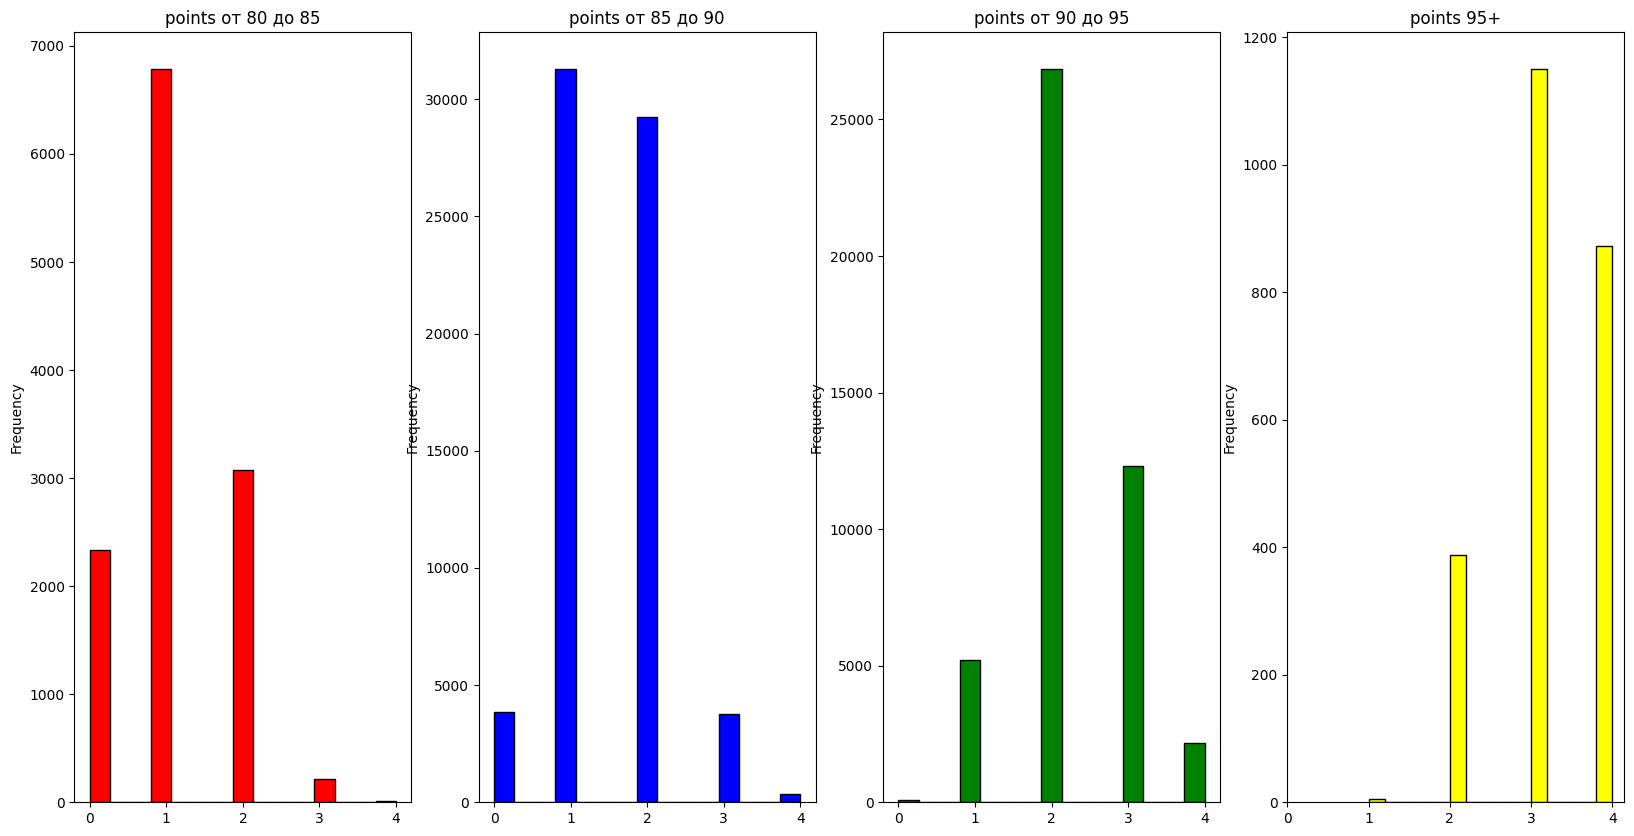

In [203]:
_, ax = plt.subplots(1,4, figsize=(20, 10))
df.loc[(df['points'] >= 80) & (df['points'] < 85)]['price_category'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('points от 80 до 85')
x1 = list(range(0, 5, 1))
ax[0].set_xticks(x1)
df.loc[(df['points'] >= 85) & (df['points'] < 90)]['price_category'].plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('points от 85 до 90')
x2 = list(range(0, 5, 1))
ax[1].set_xticks(x2)
df.loc[(df['points'] >= 90) & (df['points'] < 95)]['price_category'].plot.hist(ax=ax[2], edgecolor='black', color='green', bins=15)
ax[2].set_title('points от 90 до 95')
ax[2].set_xticks(x1)
df[df['points'] >= 95]['price_category'].plot.hist(ax=ax[3], edgecolor='black', color='yellow', bins=15)
ax[3].set_title('points 95+')
ax[3].set_xticks(x1)
plt.show()

 - 0 ценовая категория представлена в основном на 1 и 2 графике, на 4 её вообще нет
 - 1 ценовая категория представлена в основном 2 графике, но так же есть на 1 и 3
 - 2 ценовая категория представлена в основном на 2 и 3 графике
 - 3 ценовая категория представлена в основном на 2 и 3 графике, но её достаточно много и на 4 графике
 - 4 ценовая категория представлена в основном на 3 и 4 графике



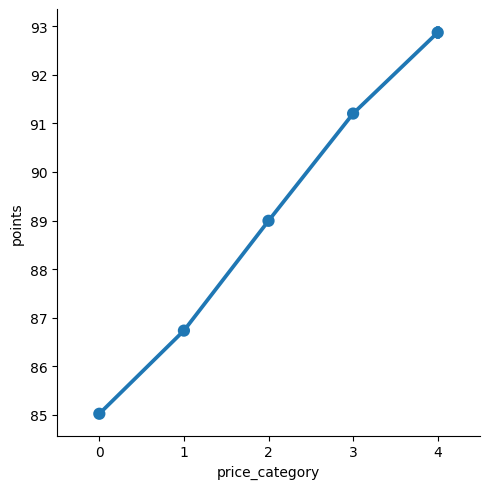

In [208]:
sns.catplot(data=df, x="price_category", y="points", kind = 'point')

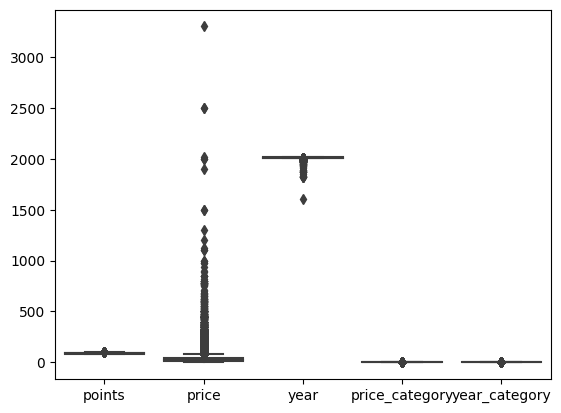

In [179]:
import seaborn as sns
sns.boxplot(data=df)
plt.show()

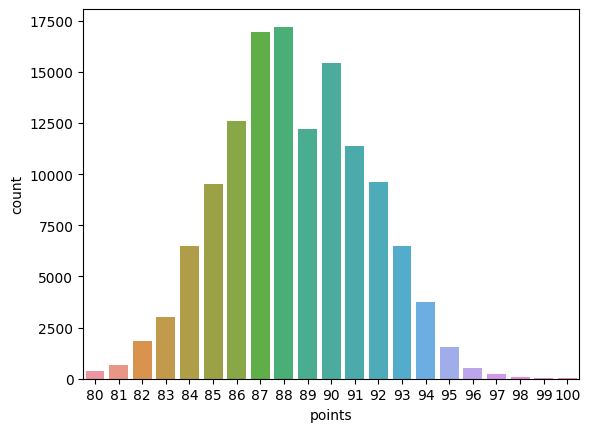

In [180]:
sns.countplot(x='points',data=df)
plt.show()

Заметим что чаще всего встречаются вина с оценками от 86 до 91

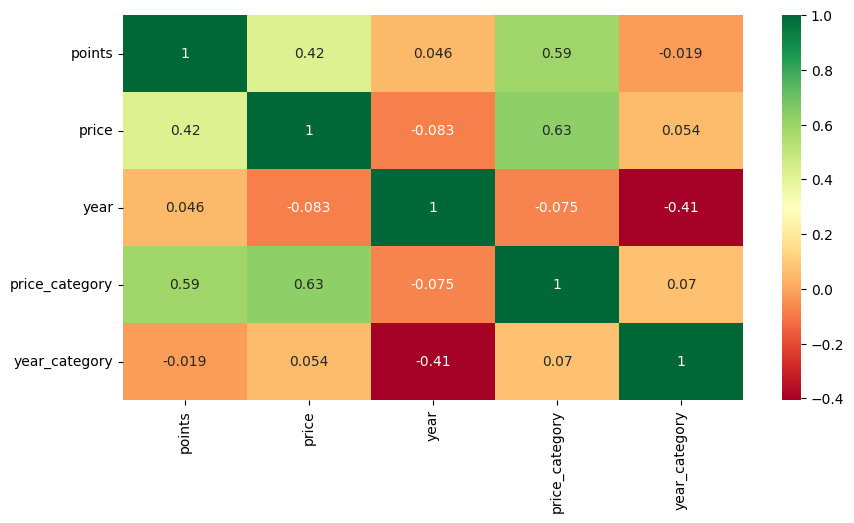

In [182]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Заметно, что признаки price_category, price коррелируют с признаком points больше всего.
Можно будет удалить признак price, т.к признак price_category оказывает больше влияния на целевой